# Evidence for Commodity Market Financialization from a Bayesian Perspective

In [1]:
from utils import *
env()
plt.rcParams.update({'font.size': 16})

--------- Dependencies ---------
python: 3.8.10 | packaged by conda-forge | (default, May 11 2021, 06:25:23) [MSC v.1916 64 bit (AMD64)]
numpy: 1.21.0
pandas: 1.2.4
matplotlib: 3.4.2
scipy: 1.7.1
statsmodels: 0.13.0
filterpy: 1.4.5


In [2]:
xs = ['SPX', 'MSCI_W', 'MSCI_EM']

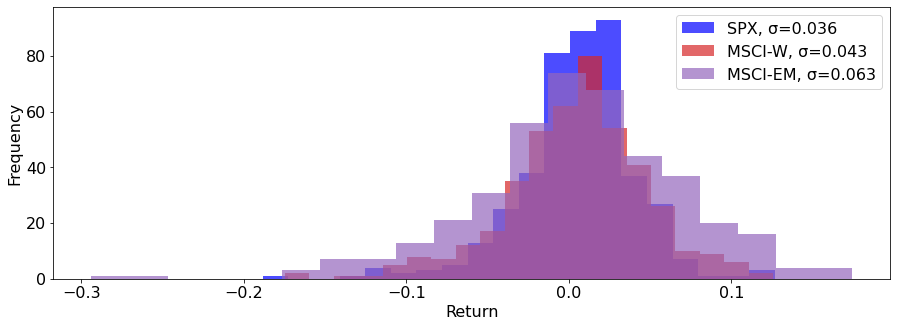

In [3]:
plt.figure(figsize=(15,5))
ys = ['SPX', 'MSCI_W', 'MSCI_EM']
master = load('data/master.csv')
colours = ['blue', 'tab:red', 'tab:purple']
counter = 0
for y in ys:
    colour = colours[counter]
    rets = master[y].pct_change()
    plt.hist(rets, bins=20, label=f"{y.replace('_', '-')}, σ={round(rets.std(),3)}", alpha=0.7, color=colour)
    counter += 1
plt.ylabel('Frequency')
plt.xlabel('Return')
plt.legend()

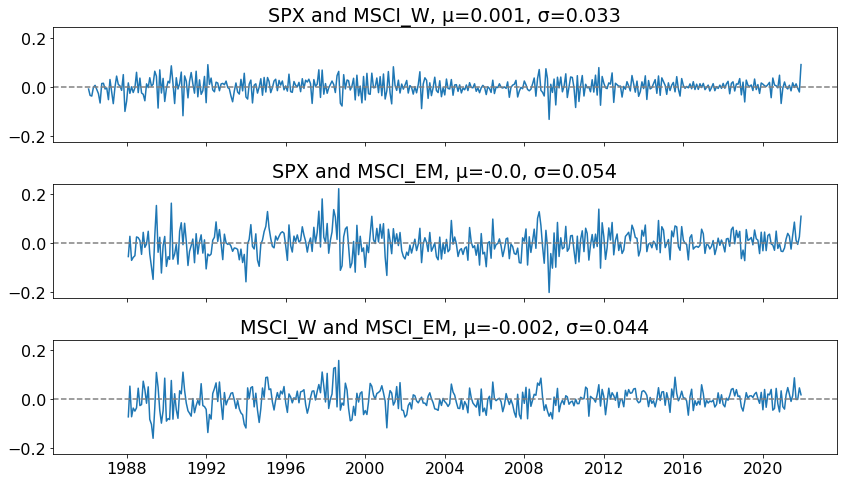

In [4]:
ks = ['SPX', 'MSCI_W']
ls = ['MSCI_W', 'MSCI_EM']
fig, ax = plt.subplots(3, figsize=(12,7), sharex=True, sharey=True)
axes = 0
for i in range(len(ks)):
    x = ks[i]
    for j in range(len(ls)):
        y = ls[j]
        if x == 'MSCI_W' and y == 'MSCI_W':
            continue
        data = master[x].pct_change() - master[y].pct_change()
        ax[axes].set_title(f'{x} and {y}, μ={round(data.mean(), 3)}, σ={round(data.std(), 3)}')
        ax[axes].plot(data)
        ax[axes].axhline(0, color='grey', linestyle='--')
        axes += 1
plt.tight_layout()
plt.show()

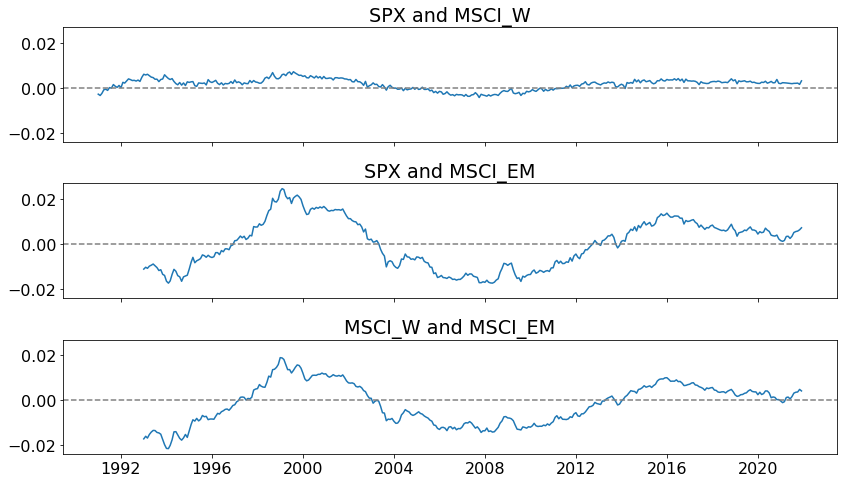

In [5]:
ks = ['SPX', 'MSCI_W']
ls = ['MSCI_W', 'MSCI_EM']
fig, ax = plt.subplots(3, figsize=(12,7), sharex=True, sharey=True)
axes = 0
for i in range(len(ks)):
    x = ks[i]
    for j in range(len(ls)):
        y = ls[j]
        if x == 'MSCI_W' and y == 'MSCI_W':
            continue
        data = (master[x].pct_change() - master[y].pct_change()).rolling(60).mean()
        ax[axes].set_title(f'{x} and {y}')
        ax[axes].plot(data)
        ax[axes].axhline(0, color='grey', linestyle='--')
        axes += 1
plt.tight_layout()
plt.show()

## 1. Is there a difference between indexed and non-indexed commodities?

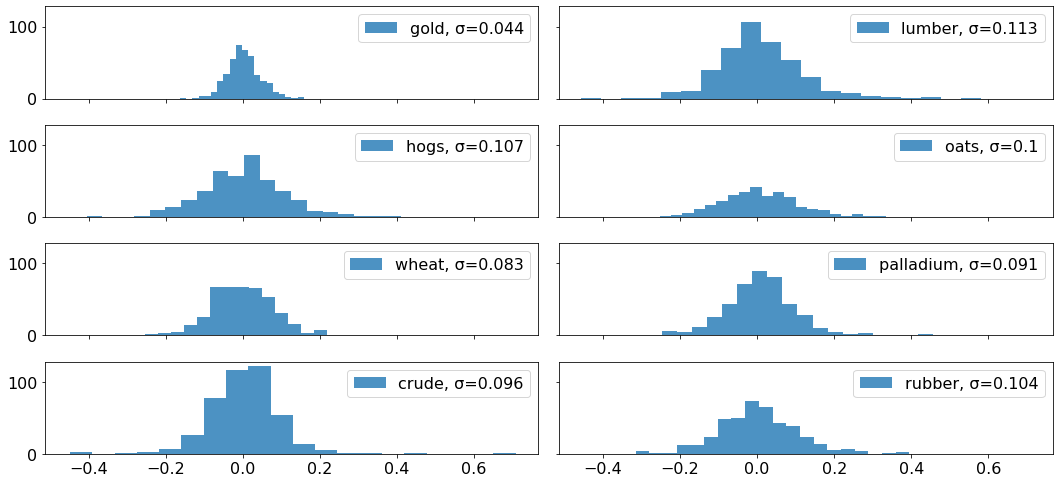

In [6]:
fig, ax = plt.subplots(4, 2, figsize=(15,7), sharex=True, sharey=True)
ys = ['gold','hog', 'wheat', 'crude'] + ['lumber', 'oats', 'palladium', 'rubber']
counter = 0
for y in ys:
    rets = master[y].pct_change()
    if counter < 4:
        ax[(counter, 0)].hist(rets, bins=20, label=f"{y.replace('hog', 'hogs')}, σ={round(rets.std(),3)}", alpha=0.8)
        ax[(counter-4, 0)].legend()
    else:
        ax[(counter-4, 1)].hist(rets, bins=20, label=f"{y.replace('hog', 'hogs')}, σ={round(rets.std(),3)}", alpha=0.8)
        ax[(counter-4, 1)].legend()
    counter += 1
plt.tight_layout()
plt.legend()

### 1.1 Indexed

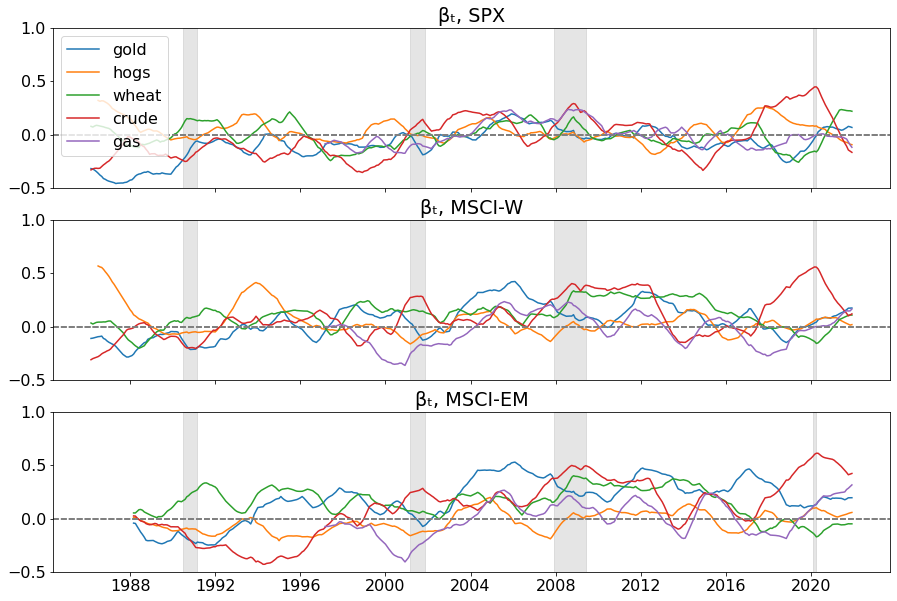

In [7]:
ys = ['gold','hog', 'wheat', 'crude', 'gas']
multi_plot(ys, xs, data='betas', title_deets='βₜ, ')

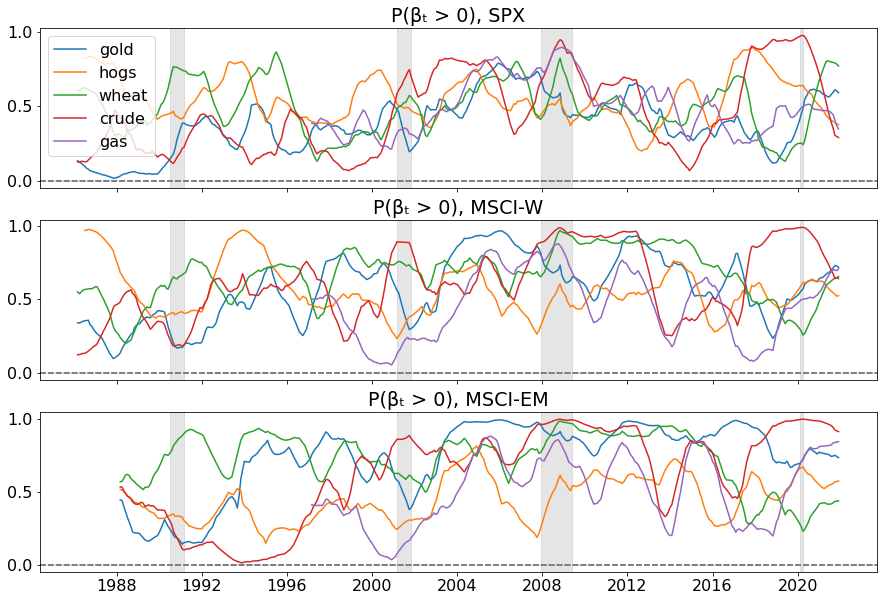

In [8]:
multi_plot(ys, xs, data='probs', title_deets='P(βₜ > 0), ')

### 1.2 Non-Indexed

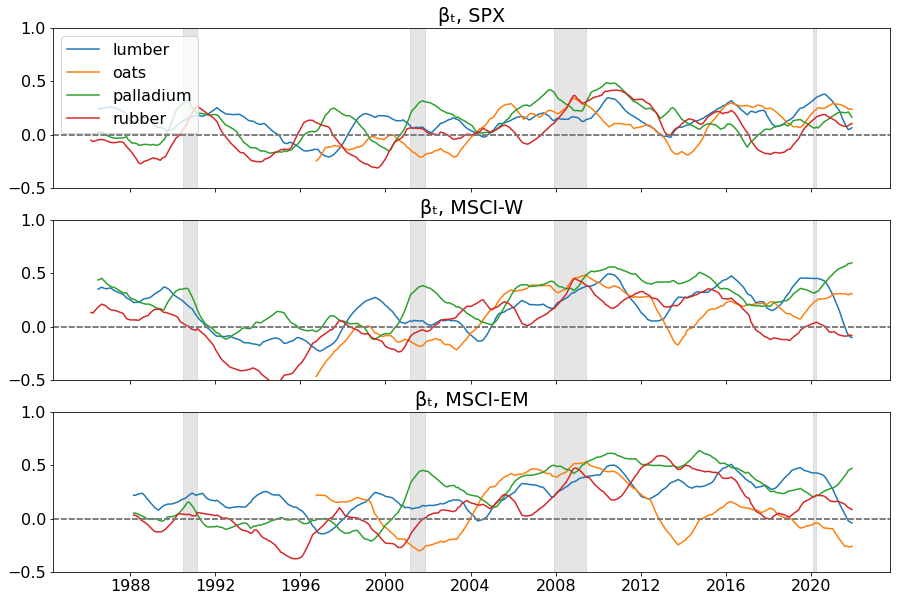

In [9]:
ys = ['lumber', 'oats', 'palladium', 'rubber']
multi_plot(ys, xs, data='betas', title_deets='βₜ, ')

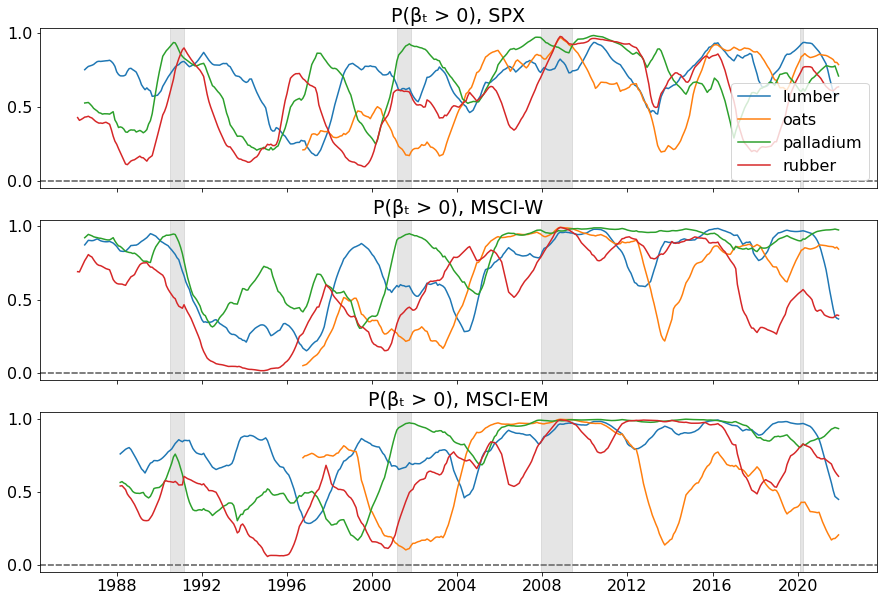

In [10]:
multi_plot(ys, xs, data='probs', title_deets='P(βₜ > 0), ')

It appears that non-indexed commodities are actually behaving slightly more homogenously than indexed with regards to equity market integration, which goes against the risk-sharing theory. However, what of indices themselves?

## 2. Commodity Indices

### 2.1 Comparison of returns between GSCI, DJCI, BCI and CRBI

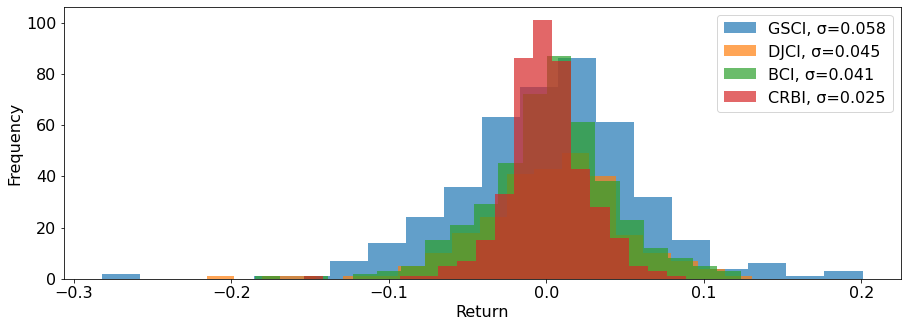

In [11]:
plt.figure(figsize=(15,5))
ys = ['GSCI', 'DJCI', 'BCI', 'CRBI']
for y in ys:
    rets = master[y].pct_change()
    plt.hist(rets, bins=20, label=f'{y}, σ={round(rets.std(),3)}', alpha=0.7)
plt.ylabel('Frequency')
plt.xlabel('Return')
plt.legend()

Text(0, 0.5, 'Volume')

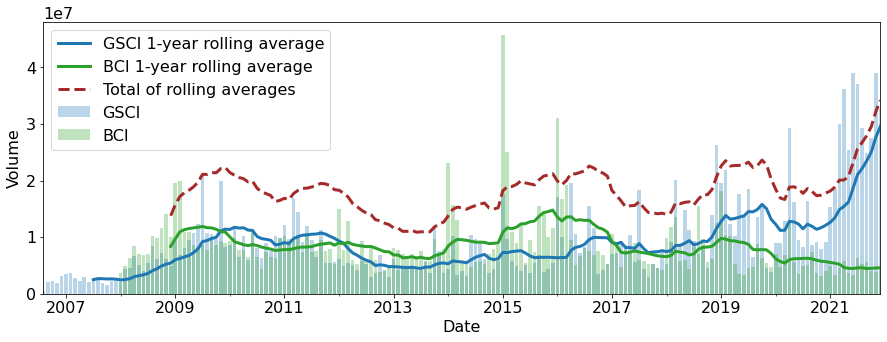

In [12]:
volume = load('data/volume.csv')
a = volume['GSCI'].rolling(12).mean()
b = volume['BCI'].rolling(12).mean()
sigma = (a+b)
a.plot(figsize=(15,5), label='GSCI 1-year rolling average', color='tab:blue', linewidth=3)
b.plot(label='BCI 1-year rolling average', color='tab:green', linewidth=3)
sigma.plot(label='Total of rolling averages', color='brown', linestyle='--', linewidth=3)
plt.bar(volume.index, volume['GSCI'], label='GSCI', color='tab:blue', alpha=0.3)
plt.bar(volume.index, volume['BCI'], label='BCI', color='tab:green', alpha=0.3)
plt.legend(loc='upper left')
plt.xlabel('Date')
plt.ylabel('Volume')

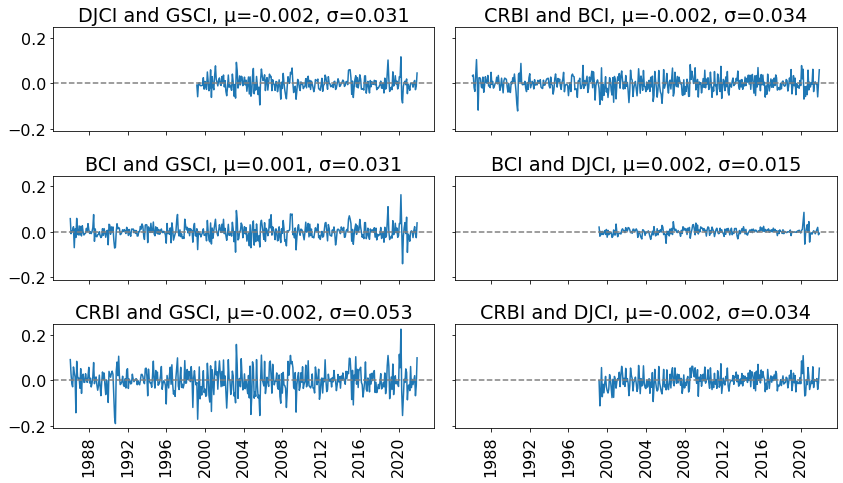

In [13]:
ks = ['DJCI', 'BCI', 'CRBI']
ls = ['GSCI', 'DJCI']
fig, ax = plt.subplots(3, 2, figsize=(12,7), sharex=True, sharey=True)
for i in range(len(ks)):
    x = ks[i]
    for j in range(len(ls)):
        axes = (i, j)
        y = ls[j]
        if x == 'DJCI' and y == 'DJCI':
            x = 'CRBI'
            y = 'BCI'
        data = master[x].pct_change() - master[y].pct_change()
        ax[axes].set_title(f'{x} and {y}, μ={round(data.mean(), 3)}, σ={round(data.std(), 3)}')
        ax[axes].plot(data)
        ax[axes].axhline(0, color='grey', linestyle='--')
        ax[axes].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

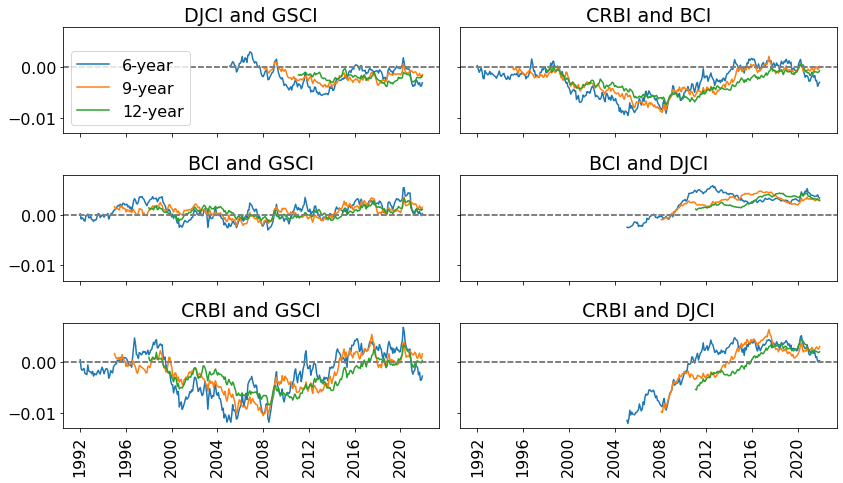

In [14]:
ks = ['DJCI', 'BCI', 'CRBI']
ls = ['GSCI', 'DJCI']
fig, ax = plt.subplots(3, 2, figsize=(12,7), sharex=True, sharey=True)
for years in range(6, 13, 3):
    for i in range(len(ks)):
        x = ks[i]
        for j in range(len(ls)):
            axes = (i, j)
            y = ls[j]
            if x == 'DJCI' and y == 'DJCI':
                x = 'CRBI'
                y = 'BCI'
            data = (master[x].pct_change() - master[y].pct_change()).rolling(12*years).mean()
            ax[axes].set_title(f'{x} and {y}')
            ax[axes].plot(data, label=f'{years}-year')
            ax[axes].axhline(0, color='grey', linestyle='--')
            ax[axes].tick_params(axis='x', rotation=90)
ax[(0,0)].legend(loc='lower left')
plt.tight_layout()
plt.show()

As can be seen, GSCI, DJCI, BCI and CRBI behave differently largely due to the different weightings used. GSCI is a production-weighted index, while DJCI is a liquidity-weighted index that tries to maintain equal diversification weighting. BCI incorporates both production and liquidity into account. CRBI is composed of usually un-indexed commodities, weighted by the calculation of geometric mean.

### 2.2 Comparison of equity market integration between GSCI, DJCI BCI and CRBI

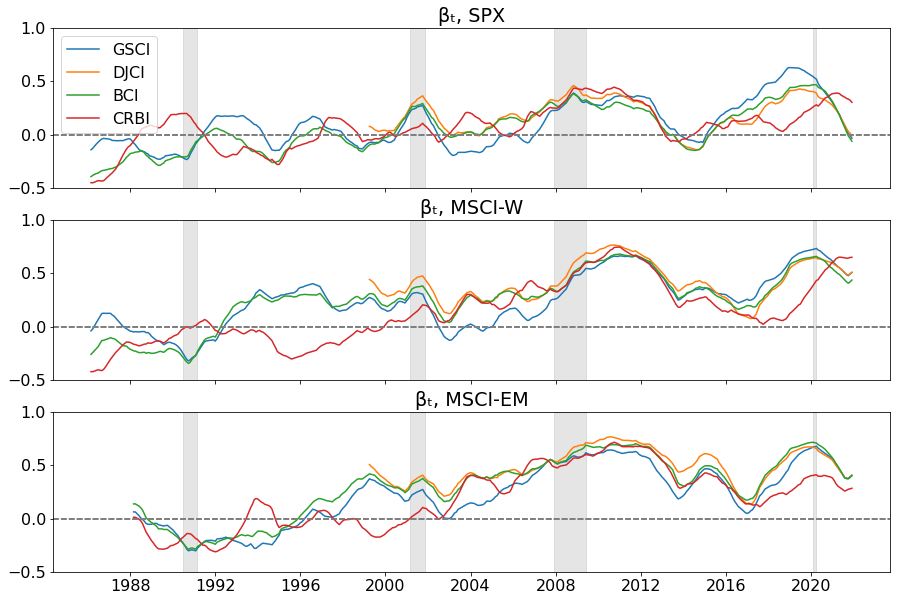

In [15]:
ys = ['GSCI', 'DJCI', 'BCI', 'CRBI']
multi_plot(ys, xs, data='betas', title_deets='βₜ, ')

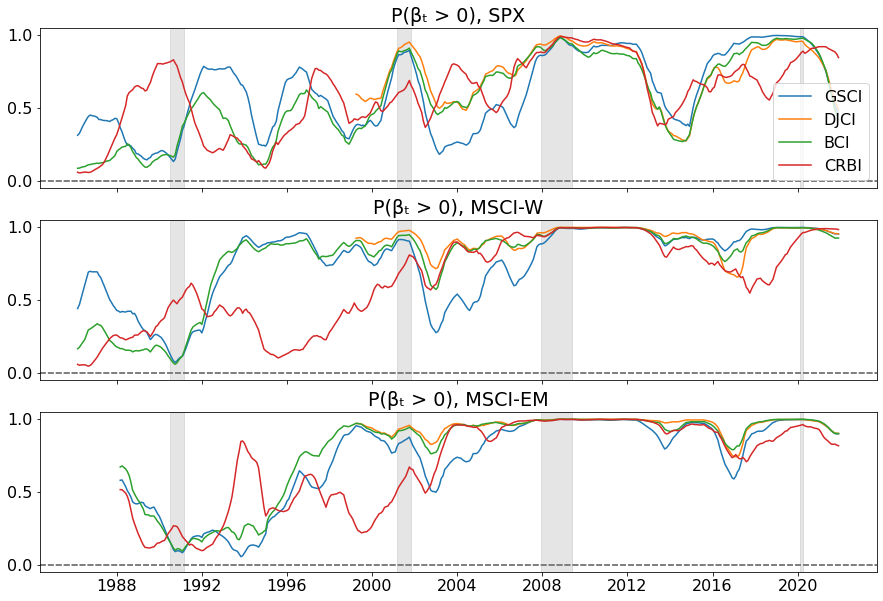

In [16]:
multi_plot(ys, xs, data='probs', title_deets='P(βₜ > 0), ')

It appears that despite the difference in index construction, the level of equity market integration remains consistent between the two indices, supporting the risk-sharing theory. The only difference is with indexed commodities - since the CRBI includes usually un-indexed commodities like scrap metal and tallow, it is slower to integrate.

### 2.3 GSECI and GSNECI integration

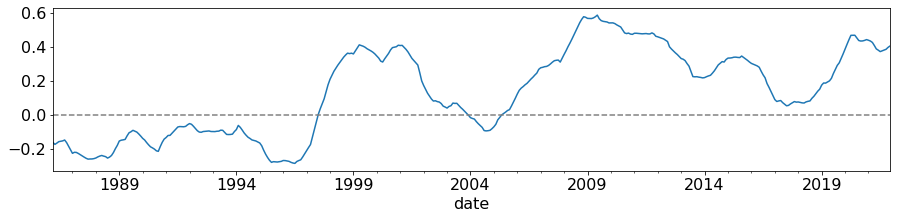

In [17]:
plt.figure(figsize=(15,3))
load('data/saved/betas.csv')['GSECI-GSNECI-smth'].plot()
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

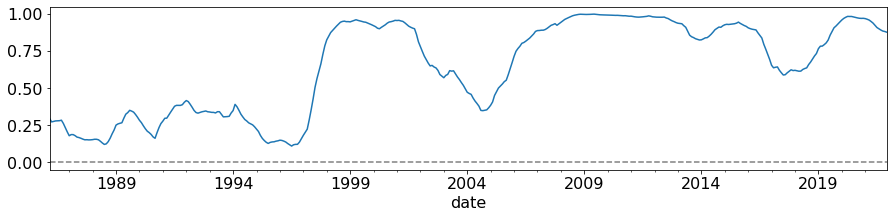

In [18]:
plt.figure(figsize=(15,3))
load('data/saved/probs.csv')['GSECI-GSNECI-smth'].plot()
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

This is good evidence that index speculation does have an effect - because both non-energy and energy indices are included in general index, so any time someone buys an index-tracking product they allocate capital to both markets, increasing integration. The sudden rise in integration coincides with the data for index speculation and financialization.

## 3. Robustness Testing

In [19]:
master_p = master.pct_change()

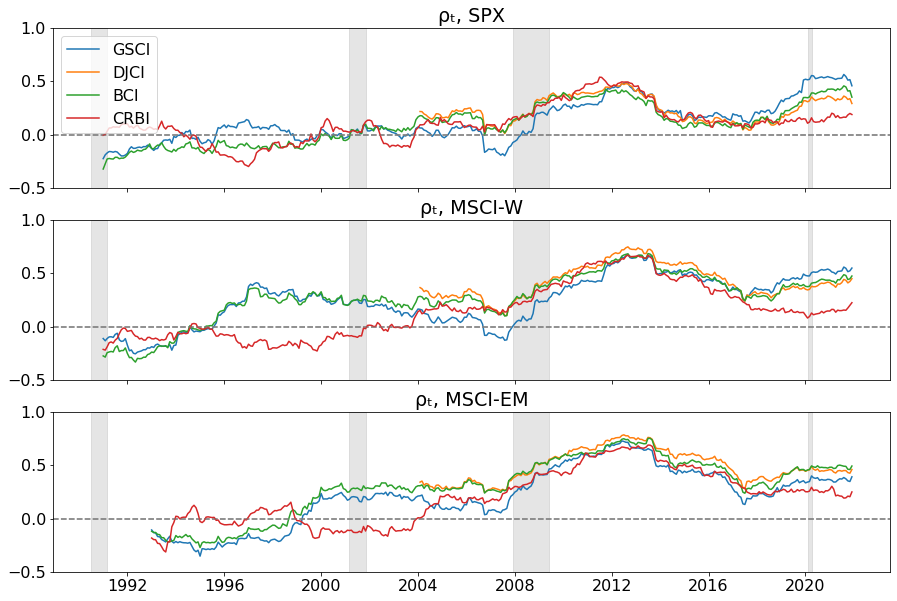

In [25]:
fig, ax = plt.subplots(3, figsize=(15, 10), sharex=True)
ax_count = 0
r = pd.read_csv('data/recessions.csv')
for x in xs:
    for y in ys:
        ax[ax_count].set_ylim([-0.5, 1])
        ax[ax_count].set_title(f"ρₜ, {x.replace('_', '-')}")
        ax[ax_count].plot(rolling_corr(clean_series(y, master_p).join(clean_series(x, master_p)), lags=60, plot=False), label=y)
        ax[ax_count].axhline(0, linestyle='--', color='grey', alpha=0.5)
    for index, row in r.iterrows():
        ax[ax_count].axvspan(pd.to_datetime(row['start'], dayfirst=True), pd.to_datetime(row['end'], dayfirst=True), color='grey', alpha=0.2)
    if ax_count == 0:
        ax[ax_count].legend()
    ax_count += 1

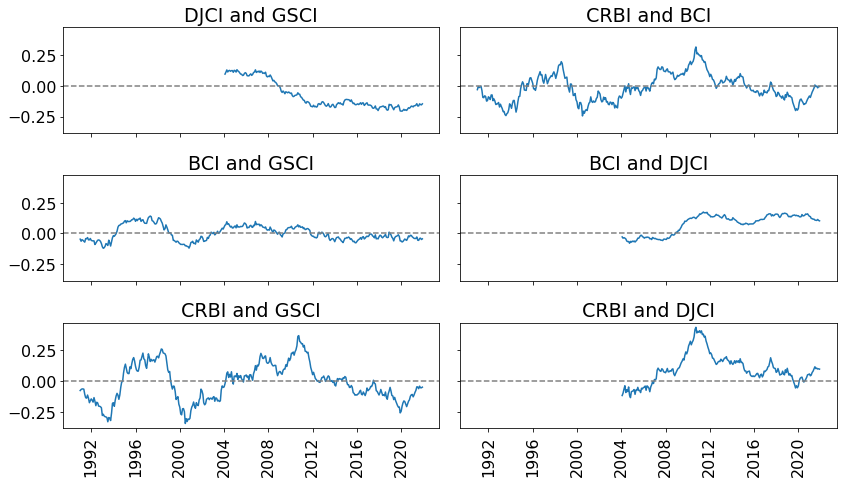

In [21]:
ks = ['DJCI', 'BCI', 'CRBI']
ls = ['GSCI', 'DJCI']
fig, ax = plt.subplots(3, 2, figsize=(12,7), sharex=True, sharey=True)
for i in range(len(ks)):
    x = ks[i]
    for j in range(len(ls)):
        axes = (i, j)
        y = ls[j]
        if x == 'DJCI' and y == 'DJCI':
            x = 'CRBI'
            y = 'BCI'
        data = (clean_series(x, master_p)[x] - clean_series(y, master_p)[y]).rolling(60).mean()
        ax[axes].set_title(f'{x} and {y}')
        ax[axes].plot(data)
        ax[axes].axhline(0, color='grey', linestyle='--')
        ax[axes].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()

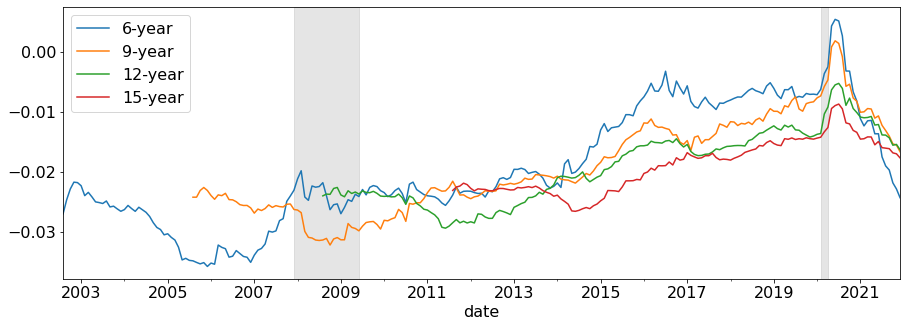

In [22]:
inds = ['crude', 'gold', 'hog', 'wheat']
non_inds = ['palladium', 'lumber', 'oats', 'rubber']
for y in range(6, 16, 3):
    ind = 0
    non_ind = 0
    for i in range(4):
        ind += master_p[inds[i]].rolling(12*y).std()
        non_ind += master_p[non_inds[i]].rolling(12*y).std()
    (ind/4 - non_ind/4).dropna().plot(label=f'{y}-year', figsize=(15,5))
for index, row in r.iterrows():
    plt.axvspan(pd.to_datetime(row['start'], dayfirst=True), pd.to_datetime(row['end'], dayfirst=True), color='grey', alpha=0.2)
plt.legend()
plt.show()

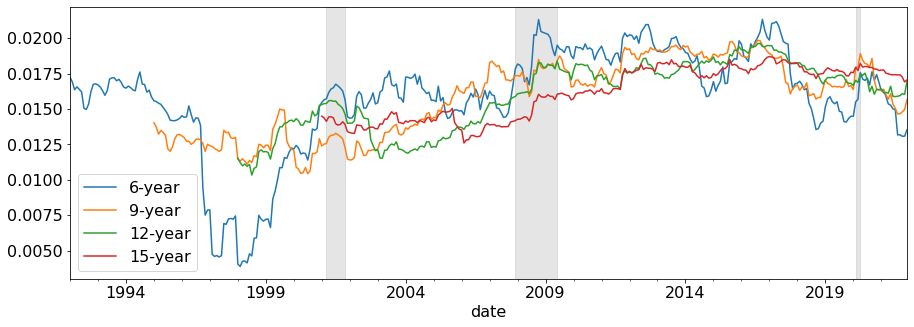

In [23]:
inds = ['BCI']
non_inds = ['CRBI']
for y in range(6, 16, 3):
    ind = 0
    non_ind = 0
    for i in range(1):
        ind += master_p[inds[i]].rolling(12*y).std()
        non_ind += master_p[non_inds[i]].rolling(12*y).std()
    (ind - non_ind).dropna().plot(label=f'{y}-year', figsize=(15,5))
for index, row in r.iterrows():
    plt.axvspan(pd.to_datetime(row['start'], dayfirst=True), pd.to_datetime(row['end'], dayfirst=True), color='grey', alpha=0.2)
plt.legend()
plt.show()